iris : 150 individus, iris_dna : 146 individus


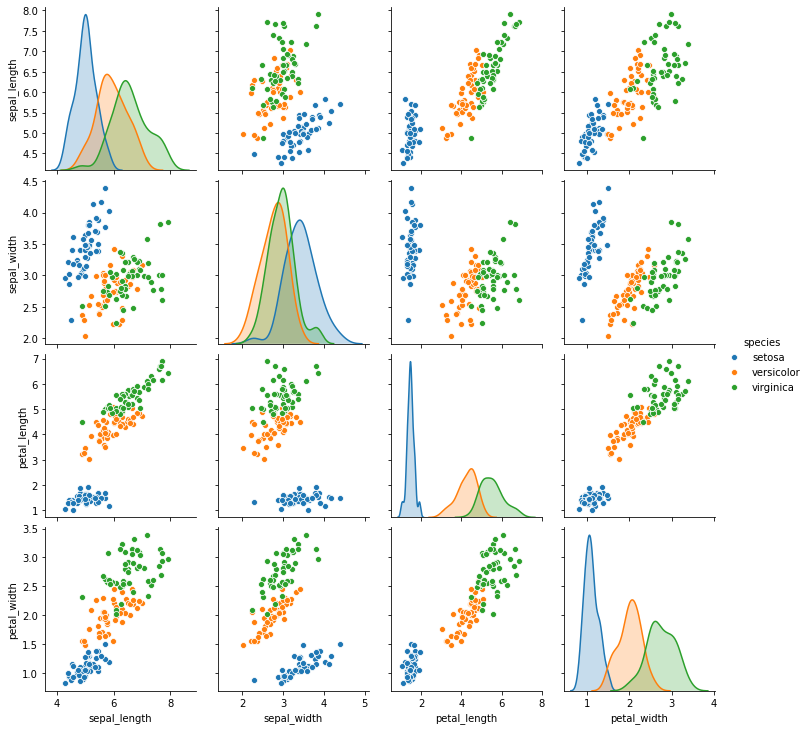

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement
iris = pd.read_csv("iris_dataset.csv")

# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()

In [2]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

In [3]:
iris_dna.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.138728,3.470118,1.441015,1.094873,setosa
1,4.849873,3.034931,1.414931,0.968687,setosa
2,4.715843,3.239083,1.295309,1.006643,setosa
4,4.988744,3.645049,1.417527,1.122947,setosa
5,5.430821,3.884073,1.699534,1.370708,setosa


In [4]:
irisNum = iris.dropna() 
### Creation d'un dataset sans les NaN

In [5]:
import scipy.stats as st
import numpy as np

###Calculs des coefficients de correlations lineaires
print(st.pearsonr(irisNum["petal_width"],irisNum["petal_length"])[0])
print(st.pearsonr(irisNum["sepal_width"],irisNum["petal_width"])[0])

0.9418817573025173
-0.247971306157846


***Cas 1***

In [6]:
import statsmodels.api as sm

###Calcul de a et b pour une regression lineaire via les moindres carres


Y = iris_dna['petal_width']
X = iris_dna[['petal_length']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_length'],result.params['intercept']

print(a,b)

0.38599421003086465 0.5092683365300003


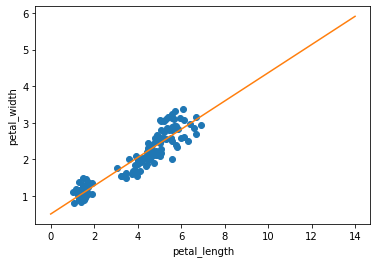

In [7]:
### Graphe de la regression lineaire

plt.plot(iris_dna.petal_length,iris_dna.petal_width, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

***Cas 2***

1.7875014940283396 1.4593274917352779


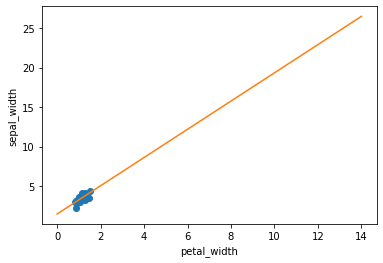

In [10]:
Y = iris_setosa['sepal_width']
X = iris_setosa[['petal_width']]
X = X.copy() 
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() 
a,b = result.params['petal_width'],result.params['intercept']

print(a,b)

plt.plot(iris_setosa.petal_width,iris_setosa.sepal_width, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

***Cas 3***

0.6992505959712975 1.0377429413261892


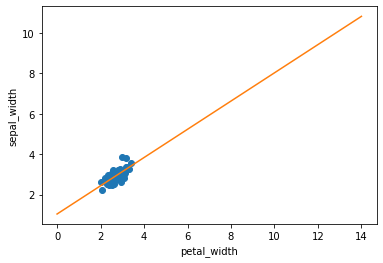

In [11]:
Y = iris_virginica['sepal_width']
X = iris_virginica[['petal_width']]
X = X.copy() 
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() 
a,b = result.params['petal_width'],result.params['intercept']

print(a,b)

plt.plot(iris_virginica.petal_width,iris_virginica.sepal_width, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

***Cas 4***

0.9735704312621848 0.8094893720788445


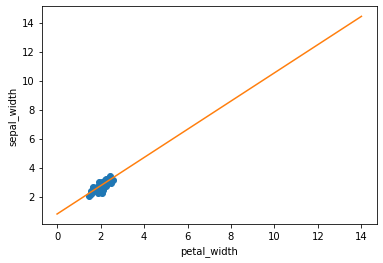

In [12]:
Y = iris_versicolor['sepal_width']
X = iris_versicolor[['petal_width']]
X = X.copy() 
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() 
a,b = result.params['petal_width'],result.params['intercept']

print(a,b)

plt.plot(iris_versicolor.petal_width,iris_versicolor.sepal_width, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

In [18]:
coeffs = {
    "cas 1" : {'a': 0.38599421003086465 , 'b':0.5092683365300003},
    "cas 2" : {'a': 1.7875014940283396 , 'b':1.4593274917352779},
    "cas 3" : {'a': 0.6992505959712975 , 'b':1.0377429413261892},
    "cas 4" : {'a': 0.9735704312621848 , 'b':0.8094893720788445},
}
lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        X = individu["petal_width"]
        if individu['species'] == 'setosa':
            a = coeffs["cas 2"]['a']
            b = coeffs["cas 2"]['b']
            Y = a*X + b
            iris.loc[i,"sepal_width"] = Y
            lignes_modifiees.append(i)
            print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))
        elif individu['species'] == 'virginica':
            a = coeffs["cas 3"]['a']
            b = coeffs["cas 3"]['b']
            Y = a*X + b
            iris.loc[i,"sepal_width"] = Y
            lignes_modifiees.append(i)
            print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))
        elif individu['species'] == 'versicolor':
            a = coeffs["cas 4"]['a']
            b = coeffs["cas 4"]['b']
            Y = a*X + b
            iris.loc[i,"sepal_width"] = Y
            lignes_modifiees.append(i)
            print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))
        else:
            print('espece non reconnue')
            break
        
        
print(iris.loc[lignes_modifiees])


On a complété sepal_width par 14.455405781180817 a partir de l'espece:setosa et de petal_width=7.270527231928286
On a complété sepal_width par 4.450309826177362 a partir de l'espece:versicolor et de petal_width=3.739658002326938
On a complété sepal_width par 3.4065378666168584 a partir de l'espece:virginica et de petal_width=3.3876194585151307
     sepal_length  sepal_width  petal_length  petal_width     species
3        4.603747    14.455406      1.480616     7.270527      setosa
61       5.879497     4.450310      4.181942     3.739658  versicolor
100      6.230628     3.406538      6.001908     3.387619   virginica
